In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("ds_salaries.csv")
print(df)

     Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD         260000   
2             Big Dat

In [3]:
#df.head()

In [4]:
#Quick summmary

df.info() #gives-column,non-null count,dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe() #gives stats related info

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
#renaming columns

df.rename(columns={"employee_residence":"location","remote_ratio":"remote"},inplace=True)

In [7]:
#check total no. of null entries in each col

df.isnull().sum()

Unnamed: 0          0
work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
location            0
remote              0
company_location    0
company_size        0
dtype: int64

# Answering EDA questions


In [8]:
#Most common job titles

df['job_title'].value_counts().head(10)

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
Principal Data Scientist        7
Name: count, dtype: int64

In [9]:
#Average salary by experience leevl

df.groupby('experience_level')['salary_in_usd'].mean().round().sort_values()

experience_level
EN     61643.0
MI     87996.0
SE    138617.0
EX    199392.0
Name: salary_in_usd, dtype: float64

In [10]:
# Top 5 countries with highest avg salary

df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head()

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
IL    119059.000000
JP    114127.333333
Name: salary_in_usd, dtype: float64

In [11]:
#Remote vs In-office average salary

df.groupby('remote')['salary_in_usd'].mean()


remote
0      106354.622047
50      80823.030303
100    122457.454068
Name: salary_in_usd, dtype: float64

In [12]:
remote=df[df['remote']==100]['salary_in_usd'].mean()
print (remote)

122457.45406824147


In [13]:
onsite=df[df['remote']==0]['salary_in_usd'].mean()
print(onsite)

106354.62204724409


In [14]:
#  Top-paying job titles.

top_paying=df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print(top_paying)

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Name: salary_in_usd, dtype: float64


<Axes: ylabel='job_title'>

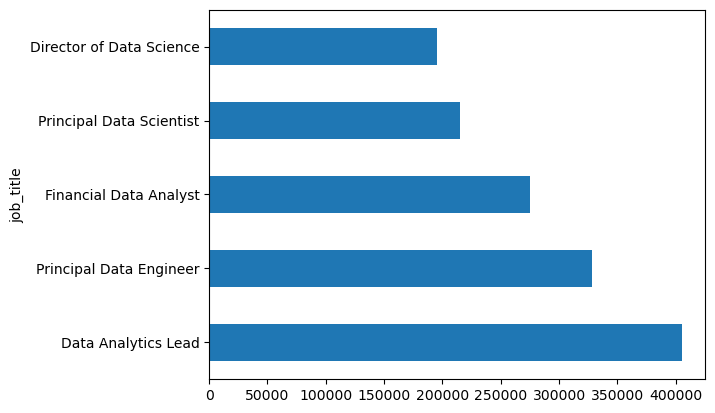

In [15]:
top_paying.plot(kind='barh')

# Data Cleaning & Feature Engineering


In [16]:
# check for missing values

df.isnull().sum()


Unnamed: 0          0
work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
location            0
remote              0
company_location    0
company_size        0
dtype: int64

In [17]:
#duplicate rows

df.duplicated().sum()

0

In [18]:
#dropping unnecessary columns

df.drop(['salary','location','company_size'],axis=1,inplace=True)

In [19]:
#Encode Categorical Variables- text to numbers

df=pd.get_dummies(df,drop_first=True)
df

,Unnamed: 0,work_year,salary_in_usd,remote,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,...,company_location_PL,company_location_PT,company_location_RO,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,0,2020,79833,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1,2020,260000,0,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2,2020,109024,50,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3,2020,20000,0,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,4,2020,150000,50,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,154000,100,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
603,603,2022,126000,100,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
604,604,2022,129000,0,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
605,605,2022,150000,100,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False


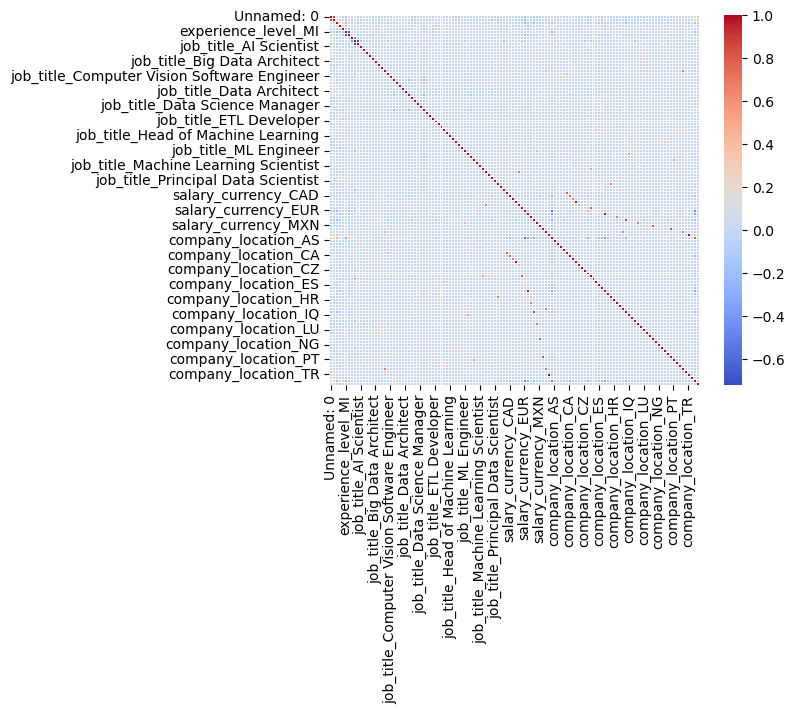

In [20]:
# checking feature correlation- how strongly features relate to salary

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=False,cmap='coolwarm', linewidths=0.5, linecolor='white', fmt=".2f", square=True)
plt.show()

In [21]:
#Split Data into Features and Target

x= df.drop('salary_in_usd',axis=1)
y=df['salary_in_usd']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (485, 123)
X_test shape: (122, 123)
y_train shape: (485,)
y_test shape: (122,)


# Model Building

In [24]:
#Train a baseline model - Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

# 1.Initialize the model
model = LinearRegression()

# 2.Train on training data
model.fit(X_train, y_train)

# 3.Predict the test data
y_pred= model.predict(X_test)

# 4.Evaluate performace
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("R^2 score:",r2_score(y_test,y_pred))

mean absolute error: 31119.6465252953
mean squared error: 2035901287.6761925
R^2 score: 0.4687894219580585


In [25]:
#Training on a tree-vased model for better accuracy

from sklearn.ensemble import RandomForestRegressor as rf

rf_model= rf(random_state=42)
rf_model.fit(X_train,y_train)
rf_pred= rf_model.predict(X_test)

print("random forest R^2 score:", r2_score(y_test,rf_pred))

random forest R^2 score: 0.4787515023203013


In [26]:
import numpy as np
df['log_salary'] = np.log1p(df['salary_in_usd'])  # for better distribution

In [27]:
# Trying xgboost- performs better with noisy/tabular data
!pip install xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test,xgb_pred))
print("R^2 score:",r2_score(y_test,xgb_pred))

MAE: 31821.268766809684
R^2 score: 0.34185791826874623


# Feature Importance

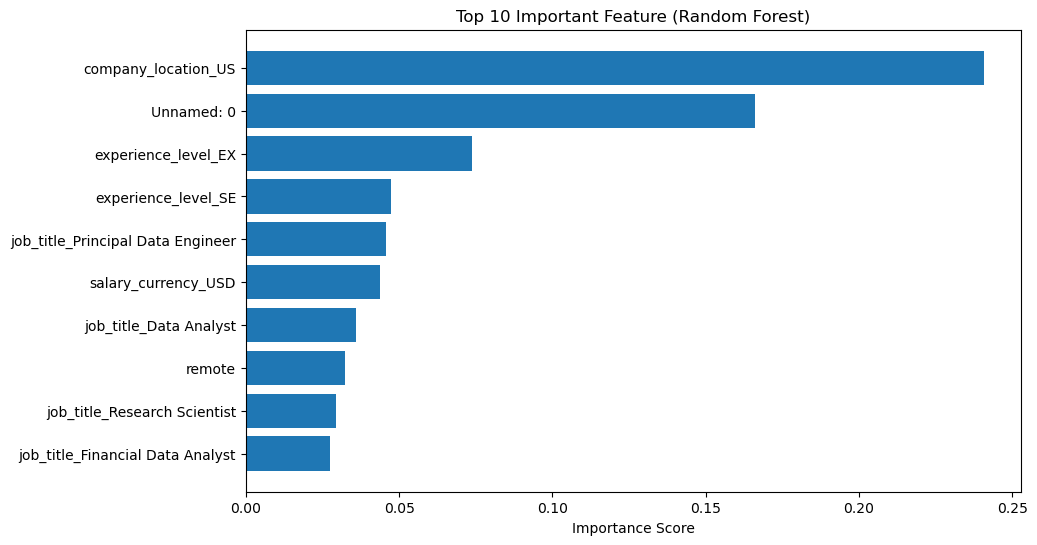

In [28]:
# Get feature importances
importances = rf_model.feature_importances_

# Map to feature names
feature_names = x.columns
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance',ascending=False)

# Plot top 10
plt.figure(figsize=(10,6))
plt.barh(feature_imp_df['Feature'][:10], feature_imp_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Importance Score')
plt.title('Top 10 Important Feature (Random Forest)')
plt.show()

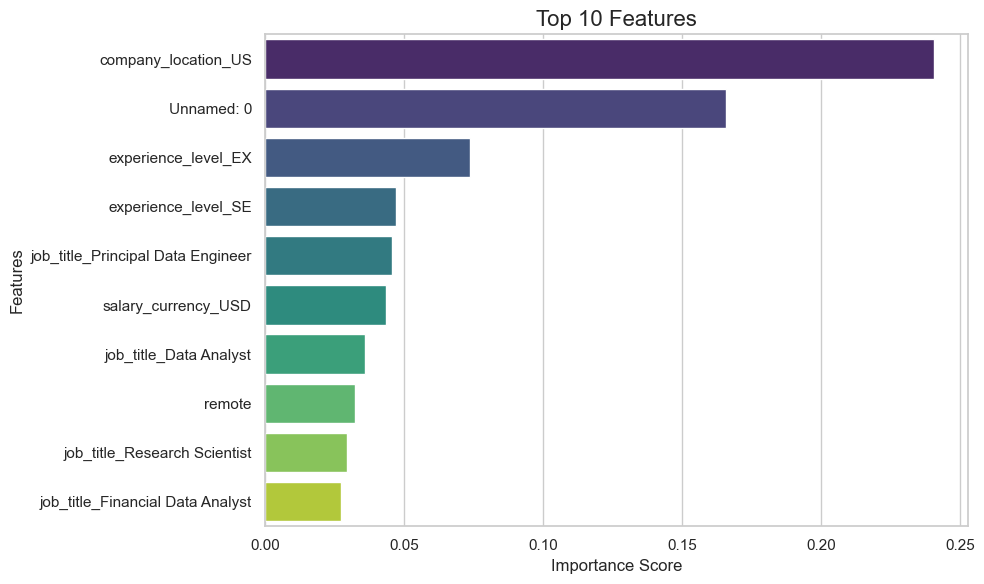

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance', y='Feature',
    data=feature_imp_df[:10],
    palette='viridis'
)
plt.title('Top 10 Features', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.tight_layout()
plt.show()


# Streamlit Web App

In [30]:
import joblib

# Save the trained model (replace `final_model` with your actual model name)
joblib.dump(rf_model, 'C:/Users/HP/OneDrive/Desktop/Job_Prediction_Project/salary_model.joblib')



['C:/Users/HP/OneDrive/Desktop/Job_Prediction_Project/salary_model.joblib']

In [31]:
# Save the model
import joblib

joblib.dump(rf_model, 'salary_model.joblib')

# Save the model input columns
model_columns = x.columns.tolist()
joblib.dump(model_columns, 'model_columns.joblib')


['model_columns.joblib']

In [32]:
import os
model_columns = X_train.columns  # after preprocessing
joblib.dump(model_columns, 'model_columns.joblib')
print(os.getcwd())  # Will show you the save location

import joblib

# Save model
joblib.dump(rf_model, 'salary_model.joblib')

# Save input columns (this is the missing file)
joblib.dump(x.columns.tolist(), 'model_columns.joblib')

import os

print("salary_model.joblib:", os.path.isfile("salary_model.joblib"))
print("model_columns.joblib:", os.path.isfile("model_columns.joblib"))

import joblib
import os

# Get the absolute path to the project folder
project_dir = r"C:\Users\HP\OneDrive\Desktop\Job_Prediction_Project"

# Save the model
joblib.dump(rf_model, os.path.join(project_dir, 'salary_model.joblib'))

# Save the column names exactly to the same directory
model_columns = x.columns.tolist()
joblib.dump(model_columns, os.path.join(project_dir, 'model_columns.joblib'))


C:\Users\HP
salary_model.joblib: True
model_columns.joblib: True


['C:\\Users\\HP\\OneDrive\\Desktop\\Job_Prediction_Project\\model_columns.joblib']